<a href="https://colab.research.google.com/github/Seghelicious/Wordcloud-of-my-competencies/blob/master/Wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
#importing packages
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from textblob import TextBlob

In [3]:
cloud = pd.read_csv('/content/drive/My Drive/Python University/competencies (2).csv')
cloud

,Competencies
0,Python
1,Microsoft-SQL-Server
2,SAS
3,Microsoft-Word
4,Microsoft-PowerPoint
5,Microsoft-Excel
6,Microsoft-Visio
7,Statistics
8,Machine-Learning
9,Oracle-11g


In [4]:
#removing numbers
def remove_num(cloud):
    cloud = ''.join([i for i in cloud if not i.isdigit()])
    return cloud

#executing function
cloud = np.vectorize(remove_num)(cloud)


#removing punctuation
from string import punctuation
def remove_punct(cloud):
    cloud = ' '.join(word.strip(punctuation) for word in cloud.split() if word.strip(punctuation))
    return cloud

#executing function
cloud = np.vectorize(remove_punct)(cloud)

#--------------------------------------------------------------------------------------

#removing other characters
def remove_u(cloud):
    cloud = cloud.replace('?','')
    cloud = cloud.replace('•','')
    cloud = cloud.replace("@",'')
    cloud = cloud.replace('▯','')
    cloud = cloud.replace("'",'')
    cloud = cloud.replace(",","")
    return cloud

#executing function
cloud = np.vectorize(remove_u)(cloud)

#--------------------------------------------------------------------------------------

#removing extra spaces
def remove_extra_space(cloud):
    word_list = cloud.split()
    cloud = ' '.join(word_list)
    return cloud

#executing function
cloud = np.vectorize(remove_extra_space)(cloud)


#removing very common words
stop_words = ['i', 'me']


def remove_stopwords(cloud):
    word_list = cloud.split()
    word_list = [word for word in word_list if word not in stop_words]
    cloud = ' '.join(word_list)
    return cloud

#executing function
cloud = np.vectorize(remove_stopwords)(cloud)
cloud = cloud.tolist()
print(cloud)

[['Python'], ['Microsoft-SQL-Server'], ['SAS'], ['Microsoft-Word'], ['Microsoft-PowerPoint'], ['Microsoft-Excel'], ['Microsoft-Visio'], ['Statistics'], ['Machine-Learning'], ['Oracle-g'], ['PostgreSQL'], ['Google-Cloud-Platform GCP'], ['BigQuery'], ['Azure'], ['MongDB'], ['APIs'], ['Git-&-Version-Control'], ['Spark'], ['MapReduce'], ['Request'], ['Beautiful-Soup'], ['Web-Scraping'], ['Mean-Square-Error'], ['Big Data'], ['Critical-Thinking'], ['PowerBI'], ['Pandas'], ['Numpy'], ['Scikit-Learn'], ['SciPy'], ['JupyterLab'], ['Google-Colaboratory'], ['Excel-VBA'], ['Regression'], ['Classification'], ['Predictive-Analytics'], ['Segmentation'], ['Clustering'], ['Discrimination-Threshold'], ['F Score'], ['Statsmodel'], ['Preprocessing'], ['Logistic-Regression'], ['XGBoost'], ['LightGBM'], ['Support-Vector-Machine'], ['Plotly'], ['K-Nearest-Neighbours'], ['K-Means'], ['Recall'], ['Precision'], ['AUC-Score'], ['Accuracy'], ['Confusion-Matrix'], ['Urllib'], ['Matplotlib'], ['Seaborn']]


In [5]:
cloud = [item for sublist in cloud for item in sublist]
cloud

['Python',
 'Microsoft-SQL-Server',
 'SAS',
 'Microsoft-Word',
 'Microsoft-PowerPoint',
 'Microsoft-Excel',
 'Microsoft-Visio',
 'Statistics',
 'Machine-Learning',
 'Oracle-g',
 'PostgreSQL',
 'Google-Cloud-Platform GCP',
 'BigQuery',
 'Azure',
 'MongDB',
 'APIs',
 'Git-&-Version-Control',
 'Spark',
 'MapReduce',
 'Request',
 'Beautiful-Soup',
 'Web-Scraping',
 'Mean-Square-Error',
 'Big Data',
 'Critical-Thinking',
 'PowerBI',
 'Pandas',
 'Numpy',
 'Scikit-Learn',
 'SciPy',
 'JupyterLab',
 'Google-Colaboratory',
 'Excel-VBA',
 'Regression',
 'Classification',
 'Predictive-Analytics',
 'Segmentation',
 'Clustering',
 'Discrimination-Threshold',
 'F Score',
 'Statsmodel',
 'Preprocessing',
 'Logistic-Regression',
 'XGBoost',
 'LightGBM',
 'Support-Vector-Machine',
 'Plotly',
 'K-Nearest-Neighbours',
 'K-Means',
 'Recall',
 'Precision',
 'AUC-Score',
 'Accuracy',
 'Confusion-Matrix',
 'Urllib',
 'Matplotlib',
 'Seaborn']

(-0.5, 1199.5, 1199.5, -0.5)

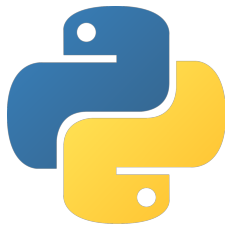

In [6]:
mask = np.array(Image.open('/content/drive/My Drive/Python University/python.png'))
plt.imshow(mask)
plt.axis('off')

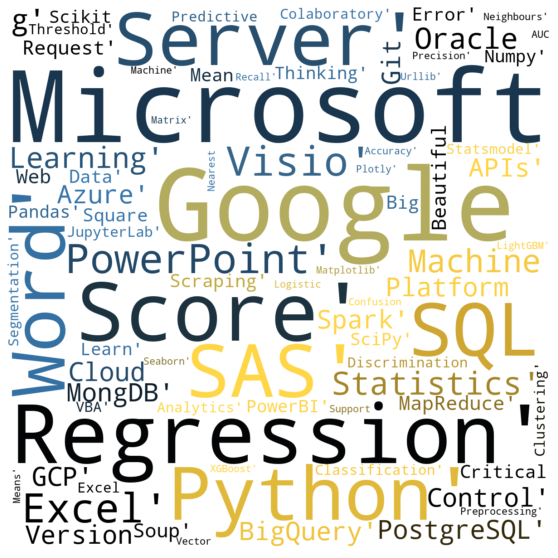

In [9]:
# lower max_font_size, change the maximum number of word and lighten the background:
from wordcloud import ImageColorGenerator

#--------------------------------------------------------------------------------------

#creating wordcloud
wordcloud = WordCloud(mask = mask, width = 3000, height = 700, contour_color = 'forestgreen', 
                      max_words = 10000, relative_scaling = 0, background_color = 'white').generate(str(cloud))
image_colors = ImageColorGenerator(mask)
plt.figure(figsize = [25, 10])
plt.imshow(wordcloud.recolor(color_func = image_colors), interpolation = 'bilinear')
plt.axis('off')
plt.show()


In [10]:
plt.savefig('/content/drive/My Drive/Python University/cloud.jpg')

<Figure size 432x288 with 0 Axes>